<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_Practice_analiz_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.shape

(113036, 18)

# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [ ]:
sales['Order_Quantity'].mean()

11.901659648253654

In [ ]:
median_cost = sales['Order_Quantity'].median()
median_cost

10.0

Є припущення що викидів не буде бо середнє значення майже дорівнює медіані

# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

<Axes: >

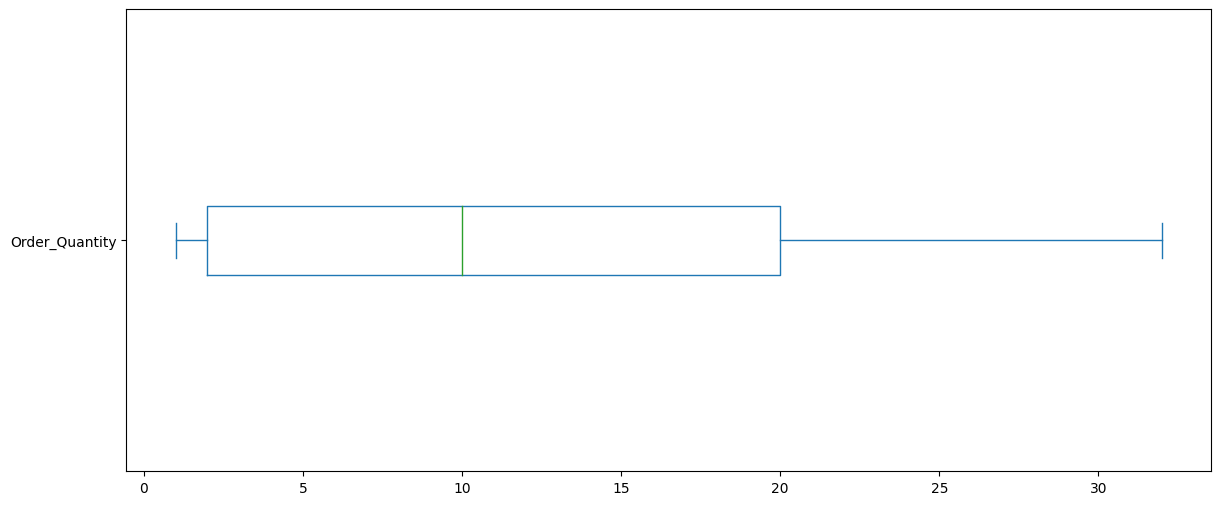

In [ ]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

Text(0.5, 0, 'Quantity')

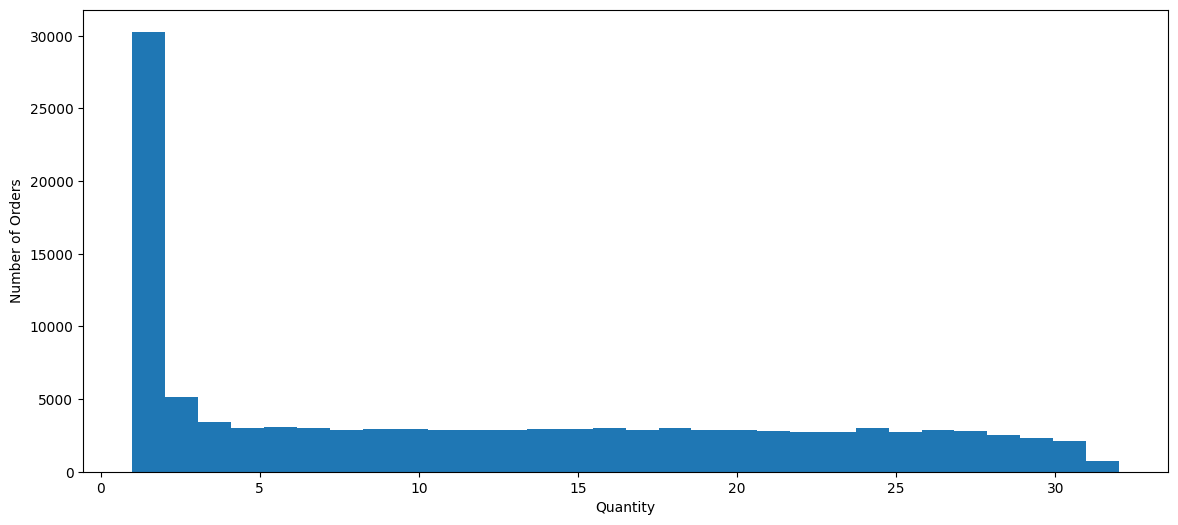

In [ ]:
ax = sales['Order_Quantity'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Number of Orders')
ax.set_xlabel('Quantity')

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

In [ ]:
sales3 = sales.copy()
num_columns = sales3.select_dtypes(include="number").columns

sales_num = sales3[num_columns]
q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
mask = mask.all(axis=1)   # включаємо лише ті рядки, де немає викиду по жодному стовпчику

cleaned_sales = sales3[mask]

In [ ]:
cleaned_sales.shape

(85008, 18)

In [ ]:
sales = cleaned_sales

<Axes: >

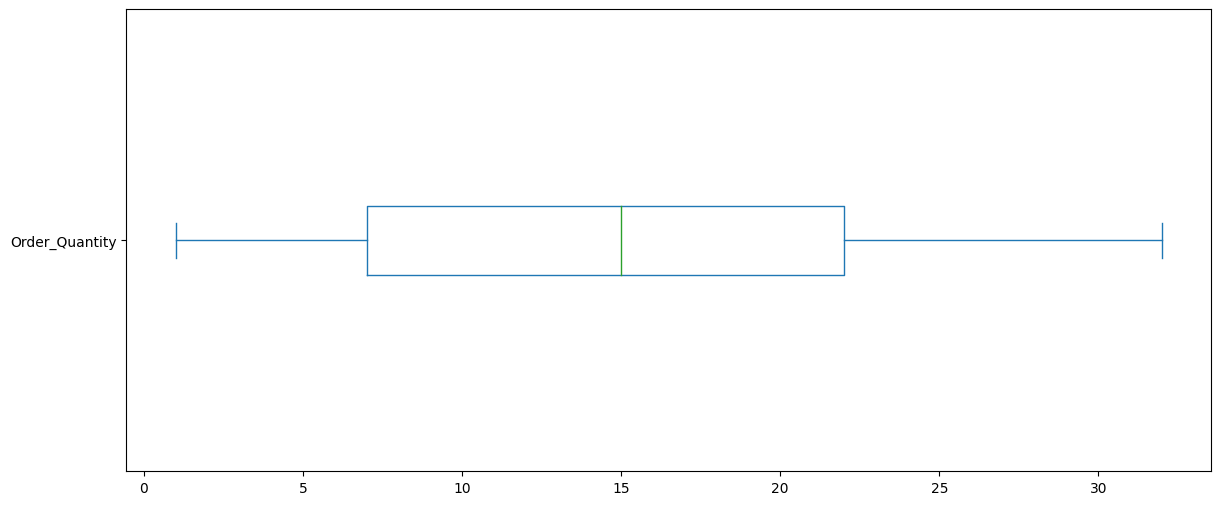

In [ ]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

In [ ]:
sales['Customer_Gender'].value_counts()

,count
Customer_Gender,
M,44147
F,40861


<Axes: ylabel='count'>

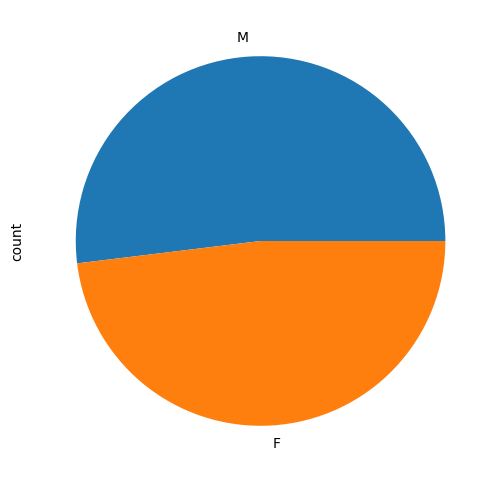

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of buyer')

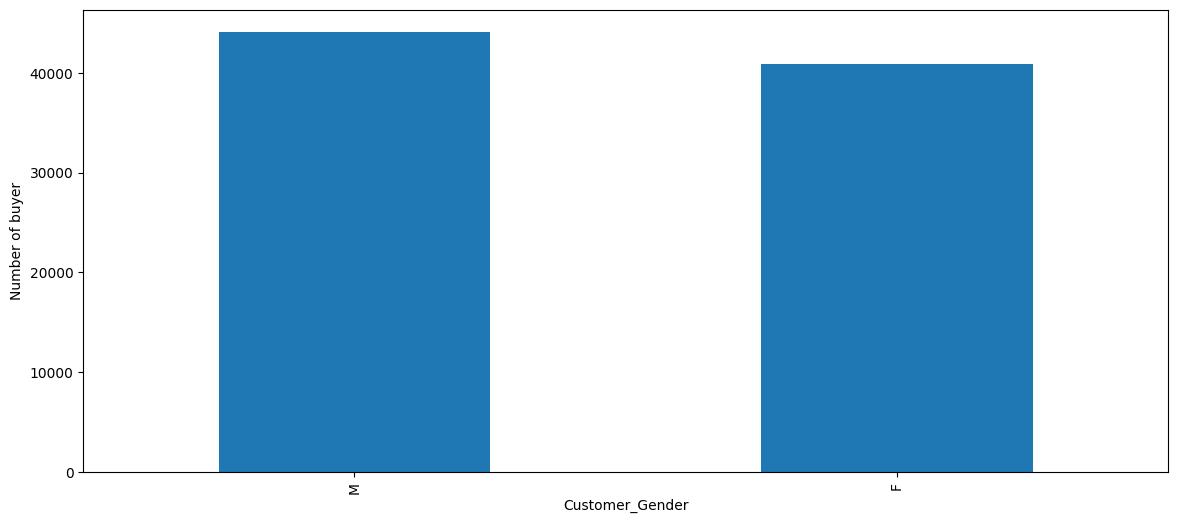

In [ ]:
ax = sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of buyer')

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

<Axes: xlabel='Order_Quantity', ylabel='Revenue'>

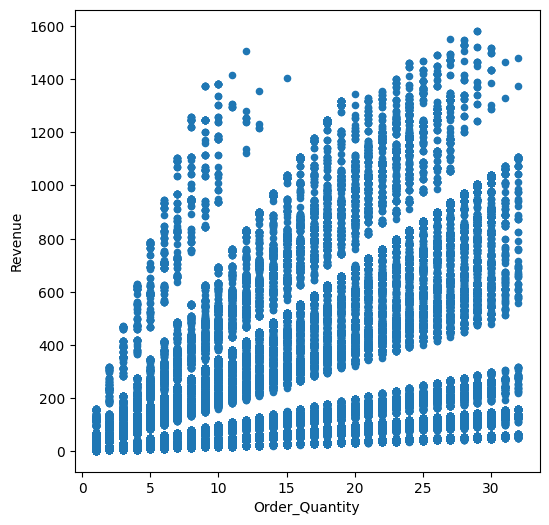

In [ ]:
sales.plot(kind='scatter', x='Order_Quantity', y='Revenue', figsize=(6,6))

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`